In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##clear null prices
def SelectModel(pathfile,modelname):
    df = pd.read_csv(pathfile)
    return df[df['model_name'].isin([modelname])].reset_index(drop=True).drop(['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','duration_listed','engine_has_gas','engine_type','has_warranty','is_exchangeable','location_region','number_of_photos','body_type','up_counter','feature_0','manufacturer_name','model_name'],axis=1)

In [3]:
cardf = SelectModel('C:/Users/Gfreitas/Downloads/ModeloPreditivoCarrosUsados/cars.csv','Golf')

In [189]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transmission     707 non-null    object 
 1   color            707 non-null    object 
 2   odometer_value   707 non-null    int64  
 3   year_produced    707 non-null    int64  
 4   engine_fuel      707 non-null    object 
 5   engine_capacity  707 non-null    float64
 6   state            707 non-null    object 
 7   drivetrain       707 non-null    object 
 8   price_usd        707 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 49.8+ KB


In [190]:
cardf.describe()

,odometer_value,year_produced,engine_capacity,price_usd
count,707.000000,707.000000,707.000000,707.000000
mean,264013.724187,1997.855728,1.640877,3605.128472
std,128127.841690,8.360443,0.239655,3207.793964
min,1.000000,1976.000000,1.100000,187.590000
25%,184710.000000,1992.000000,1.400000,1250.000000
50%,265000.000000,1997.000000,1.600000,2500.000000
75%,331500.000000,2003.000000,1.900000,4900.000000
max,1000000.000000,2016.000000,2.800000,19950.000000


<AxesSubplot:xlabel='state', ylabel='price_usd'>

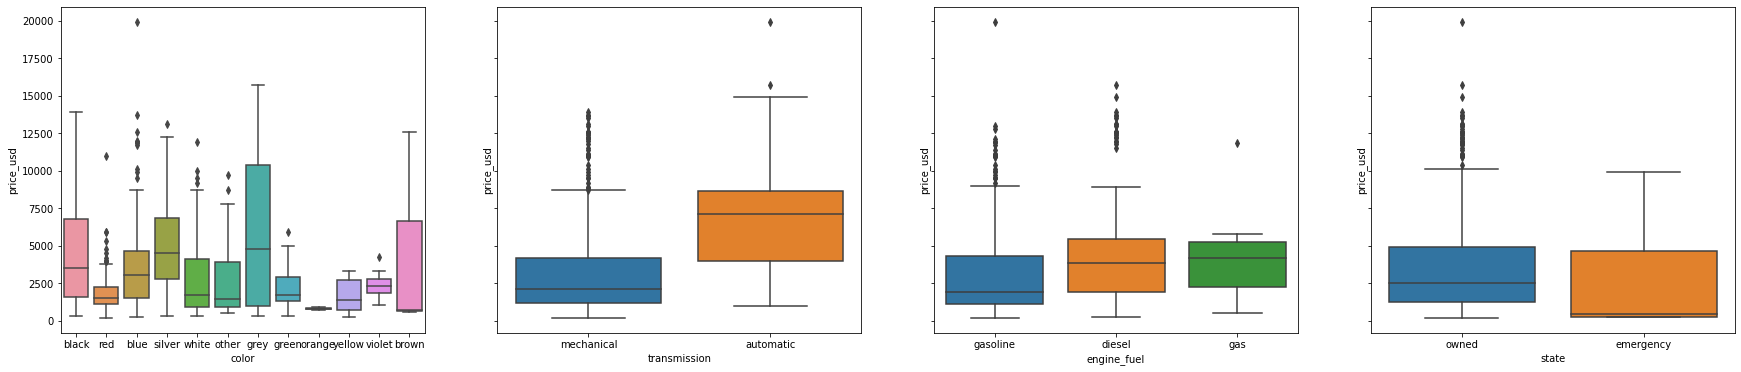

In [191]:
## Pipeline, count number of elements, loop creation
#print(vwjetta_df['drivetrain'].value_counts())
#print(vwjetta_df['state'].value_counts())
#print(vwjetta_df['transmission'].value_counts())
#print(vwjetta_df['color'].value_counts())
#print(vwjetta_df['engine_fuel'].value_counts())
## Show counts on plot
##iteract all columns minus price
fig, axs = plt.subplots(ncols=4, figsize=(30,6),sharey=True)
sns.boxplot(x='color',y='price_usd',data=cardf, ax=axs[0])
sns.boxplot(x='transmission',y='price_usd',data=cardf, ax=axs[1])
sns.boxplot(x='engine_fuel',y='price_usd',data=cardf, ax=axs[2])
sns.boxplot(x='state',y='price_usd',data=cardf, ax=axs[3])

In [10]:
def Dummies(df,column):
    return pd.concat([df, pd.get_dummies(df[column])],axis=1).drop(column,axis=1)

In [11]:
cardf = Dummies(SelectModel('C:/Users/Gfreitas/Downloads/ModeloPreditivoCarrosUsados/cars.csv','Golf'),['transmission','state','engine_fuel','drivetrain','color'])

In [194]:
cardf.corr()

,odometer_value,year_produced,engine_capacity,price_usd,transmission_automatic,transmission_mechanical,state_emergency,state_owned,engine_fuel_diesel,engine_fuel_gas,...,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
odometer_value,1.000000,-0.387732,0.135553,-0.360965,-0.191287,0.191287,-0.045641,0.045641,0.128724,-0.023293,...,-0.006805,-0.004490,-0.019449,-0.034949,0.007606,0.095739,-0.015087,-0.043058,0.065971,-0.013346
year_produced,-0.387732,1.000000,-0.050780,0.901890,0.329106,-0.329106,-0.013167,0.013167,0.156009,0.039345,...,-0.006686,-0.111494,0.113381,-0.053270,-0.051183,-0.226866,0.185821,-0.036432,-0.086270,-0.071275
engine_capacity,0.135553,-0.050780,1.000000,-0.086634,-0.025575,0.025575,0.055033,-0.055033,0.476750,-0.070755,...,-0.038400,0.066695,-0.042082,0.024269,-0.052831,0.008903,-0.004576,0.060525,-0.012711,0.020835
price_usd,-0.360965,0.901890,-0.086634,1.000000,0.366178,-0.366178,-0.020393,0.020393,0.165450,0.027917,...,0.021016,-0.108463,0.168226,-0.046194,-0.050502,-0.228855,0.149448,-0.056454,-0.086163,-0.050685
transmission_automatic,-0.191287,0.329106,-0.025575,0.366178,1.000000,-1.000000,-0.034429,0.034429,-0.038644,0.006491,...,-0.024293,-0.088692,0.027051,-0.019821,0.013181,-0.106448,0.139021,-0.021834,0.012150,-0.031407
transmission_mechanical,0.191287,-0.329106,0.025575,-0.366178,-1.000000,1.000000,0.034429,-0.034429,0.038644,-0.006491,...,0.024293,0.088692,-0.027051,0.019821,-0.013181,0.106448,-0.139021,0.021834,-0.012150,0.031407
state_emergency,-0.045641,-0.013167,0.055033,-0.020393,-0.034429,0.034429,1.000000,-1.000000,0.042477,-0.009252,...,-0.006039,-0.022049,-0.024121,-0.004928,-0.018787,0.000648,-0.035783,-0.013150,-0.033741,0.176198
state_owned,0.045641,0.013167,-0.055033,0.020393,0.034429,-0.034429,-1.000000,1.000000,-0.042477,0.009252,...,0.006039,0.022049,0.024121,0.004928,0.018787,-0.000648,0.035783,0.013150,0.033741,-0.176198
engine_fuel_diesel,0.128724,0.156009,0.476750,0.165450,-0.038644,0.038644,0.042477,-0.042477,1.000000,-0.064123,...,0.006028,0.026610,-0.014175,0.024455,-0.066371,-0.031932,0.094313,-0.001770,0.065913,0.020176
engine_fuel_gas,-0.023293,0.039345,-0.070755,0.027917,0.006491,-0.006491,-0.009252,0.009252,-0.064123,1.000000,...,-0.006528,-0.023833,-0.026072,-0.005326,-0.020307,-0.005729,-0.038677,-0.014213,0.096670,-0.008439


In [5]:
#Vamos Analisar a significância estatística das variáveis em comparação com o preço (price_usd).
#Neste projeto, vamos determinar p < 0.05 como estatisticamente significante, ou seja, temos confiança de >95% de que a correlação entre os dados é significante, e não uma coincidência.
##move price column to end and remove from loop
def CoefPearson(df):
    for x in list(df.columns):
        coef, p = stats.pearsonr(df[x], df['price_usd'])
        print("For",x,"x Price Pearson Coef:",round(coef,2),"P-Value:",round(p,2))
    return 

In [12]:
CoefPearson(cardf)
#filter p < 0.05

For odometer_value x Price Pearson Coef: -0.36 P-Value: 0.0
For year_produced x Price Pearson Coef: 0.9 P-Value: 0.0
For engine_capacity x Price Pearson Coef: -0.09 P-Value: 0.02
For price_usd x Price Pearson Coef: 1.0 P-Value: 0.0
For transmission_automatic x Price Pearson Coef: 0.37 P-Value: 0.0
For transmission_mechanical x Price Pearson Coef: -0.37 P-Value: 0.0
For state_emergency x Price Pearson Coef: -0.02 P-Value: 0.59
For state_owned x Price Pearson Coef: 0.02 P-Value: 0.59
For engine_fuel_diesel x Price Pearson Coef: 0.17 P-Value: 0.0
For engine_fuel_gas x Price Pearson Coef: 0.03 P-Value: 0.46
For engine_fuel_gasoline x Price Pearson Coef: -0.17 P-Value: 0.0
For drivetrain_all x Price Pearson Coef: 0.13 P-Value: 0.0
For drivetrain_front x Price Pearson Coef: -0.11 P-Value: 0.0
For drivetrain_rear x Price Pearson Coef: -0.02 P-Value: 0.53
For color_black x Price Pearson Coef: 0.14 P-Value: 0.0
For color_blue x Price Pearson Coef: 0.04 P-Value: 0.32
For color_brown x Price Pear

In [7]:
#Teste de ANOVA (Analise de Variância)
#O teste de ANOVA testa a significância da variação das médias entre grupos de uma mesma variável.
#Dois parâmetros são observados no teste ANOVA: Teste_F e Valor_P.
#Teste_F: ANOVA assume que a hipótese que a média entre os grupos é a mesma, e quantifica o desvio da média calculada pela média assumida. Quanto maior o Teste_F, maior a diferença entre médias.
#Valor_P: Indica o quão estatisticamente significante é o valor de Teste_F.
###move price column to end and remove from loop
def Anova(df):
    for x in list(df.columns):
        f_val, p_val = stats.f_oneway(df[x],df['price_usd'])
        print("ANOVA",x,"x Price: F-Value=", round(f_val,2),"P-Value:", round(p_val,2))
    return 

In [13]:
#compare in groups of same variable
Anova(cardf)

ANOVA odometer_value x Price: F-Value= 2918.58 P-Value: 0.0
ANOVA year_produced x Price: F-Value= 177.49 P-Value: 0.0
ANOVA engine_capacity x Price: F-Value= 892.18 P-Value: 0.0
ANOVA price_usd x Price: F-Value= -0.0 P-Value: nan
ANOVA transmission_automatic x Price: F-Value= 892.93 P-Value: 0.0
ANOVA transmission_mechanical x Price: F-Value= 892.56 P-Value: 0.0
ANOVA state_emergency x Price: F-Value= 892.99 P-Value: 0.0
ANOVA state_owned x Price: F-Value= 892.5 P-Value: 0.0
ANOVA engine_fuel_diesel x Price: F-Value= 892.85 P-Value: 0.0
ANOVA engine_fuel_gas x Price: F-Value= 892.99 P-Value: 0.0
ANOVA engine_fuel_gasoline x Price: F-Value= 892.65 P-Value: 0.0
ANOVA drivetrain_all x Price: F-Value= 892.99 P-Value: 0.0
ANOVA drivetrain_front x Price: F-Value= 892.5 P-Value: 0.0
ANOVA drivetrain_rear x Price: F-Value= 892.99 P-Value: 0.0
ANOVA color_black x Price: F-Value= 892.9 P-Value: 0.0
ANOVA color_blue x Price: F-Value= 892.89 P-Value: 0.0
ANOVA color_brown x Price: F-Value= 892.99 

In [199]:
#vwjetta_df.drop(['gas','diesel','hybrid-petrol','engine_capacity'],axis=1,inplace=True)
#grp_year_produced=vwjetta_df[['year_produced', 'price_usd']].groupby(['year_produced'])
#grp_year_produced.head()

Model Equation: Predicted Price = -687740.0671526314 + ( 346.0436035430563 * Year Produced)


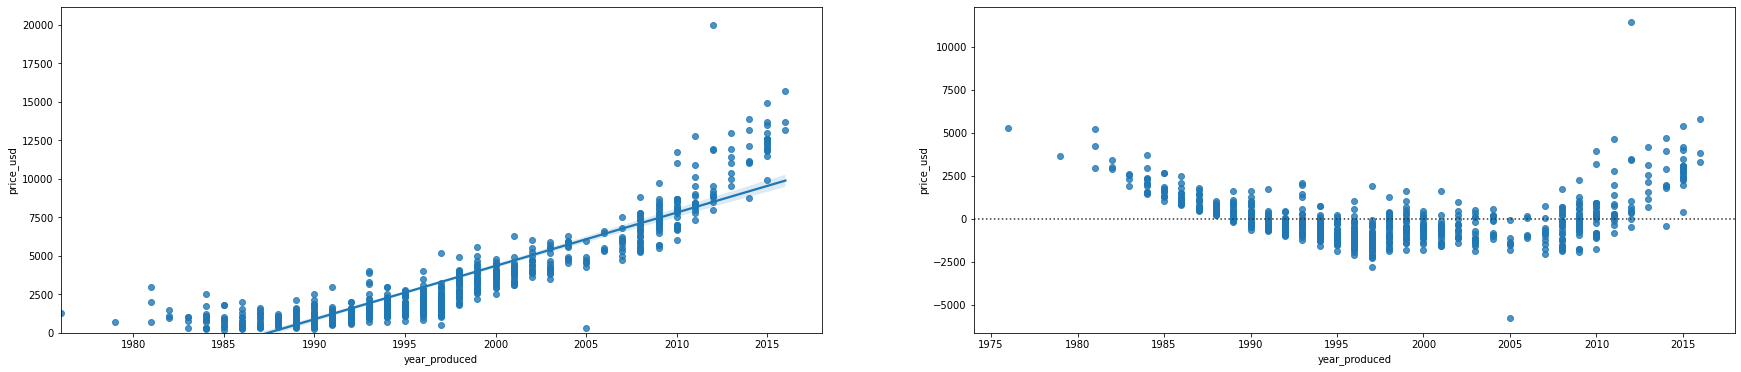

In [230]:
#Regressão Linear Simples + Residual Plot
lm = LinearRegression()
X = cardf[['year_produced']]
Y = cardf['price_usd']
lm.fit(X,Y)
fig, axs = plt.subplots(ncols=2, figsize=(30,6))
ax0 = sns.regplot(x=X,y=Y,data=cardf,ax=axs[0])
ax1 = sns.residplot(x=X,y=Y,data=cardf,ax=axs[1])
ax0.set_ylim(0,)
ax0.set_xlim(cardf['year_produced'].min(),)
print('Model Equation: Predicted Price =',lm.intercept_,'+ (',float(lm.coef_),'*','Year Produced)')
#Residual plot shows that linear regression is not a good model (curvy residual)

In [202]:
#Regressão Linear Múltipla
lm1 = LinearRegression()
Z = vwjetta_df[['odometer_value','year_produced', 'transmission_automatic','state_emergency']]
lm1.fit(Z,Y)
width = 6
height = 6
print("Ponto de Interceptação:",lm1.intercept_)
print("Coeficientes:",lm1.coef_)
print('Equação do Modelo: Preço = ',lm1.intercept_,'+ (',lm1.coef_[0],'*','Odômetro)+(',lm1.coef_[1],'*','Ano Produzido)+(',lm1.coef_[2],'*','Automático? 1-Sim, 0-Não)+(',lm1.coef_[3],'*','Acidentes? 1-Sim, 0-Não)')
print('Carro com 120000 km rodados, ano de 2010, automático, sem acidentes, tem o preço predito :',(lm1.coef_[0]*120000)+(lm1.coef_[1]*2010)+(lm1.coef_[2]*1)+(lm1.coef_[3]*0)+lm1.intercept_)

Ponto de Interceptação: -665940.7550091271
Coeficientes: [-1.97551359e-04  3.35113360e+02  7.55112185e+02 -2.30703378e+02]
Equação do Modelo: Preço =  -665940.7550091271 + ( -0.00019755135864136245 * Odômetro)+( 335.1133596392353 * Ano Produzido)+( 755.1121847023506 * Automático? 1-Sim, 0-Não)+( -230.7033781225172 * Acidentes? 1-Sim, 0-Não)
Carro com 120000 km rodados, ano de 2010, automático, sem acidentes, tem o preço predito : 8368.503887401195


In [176]:
cardf

,odometer_value,year_produced,engine_capacity,price_usd,transmission_automatic,transmission_mechanical,state_emergency,state_owned,engine_fuel_diesel,engine_fuel_gas,...,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,213000,2001,1.8,6300.00,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260000,1999,1.9,3400.00,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,280000,1996,1.9,2100.00,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,290000,1994,1.6,1480.00,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,267000,2000,1.9,4000.00,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,200000,2009,1.4,7000.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
703,291500,1994,1.9,1500.00,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
704,240000,1983,1.1,350.00,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
705,400000,1990,1.6,711.37,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


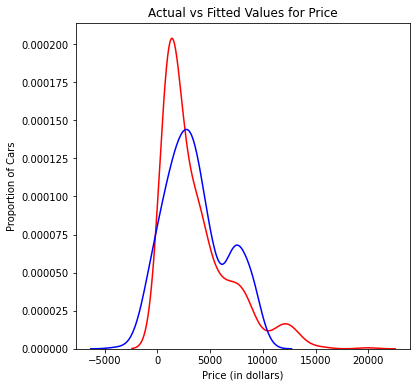

In [203]:
Y_hat = lm1.predict(Z)
plt.figure(figsize=(width, height))
ax1 = sns.kdeplot(vwjetta_df['price_usd'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

        3        2
0.1785 x - 1056 x + 2.084e+06 x - 1.371e+09


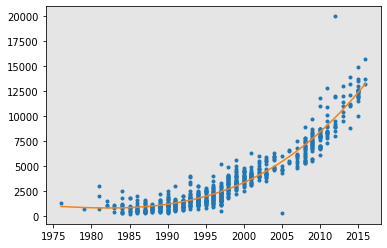

In [204]:
#Regressao Polinomial
x = cardf['year_produced']

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(x.min(),x.max())
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.show()
    plt.close()

f = np.polyfit(x, Y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, Y, 'year_produced')

In [205]:
J = 2010 #input do ano a ser predito
print((p[0])+(p[1]*(J))+(p[2]*(J**2))+(p[3]*(J**3)))

8356.238975763321


In [206]:
#Avaliar melhor modelo:
#RLS RSquared e MSE
print('RSquared é:',lm.score(X,Y))
Yhat=lm.predict(X)
mse1 = mean_squared_error(cardf['price_usd'], Yhat)
print('MSE é:', mse1)

RSquared é: 0.8134058215471239
MSE é: 1917327.5345821206


In [207]:
#RLM RSquared e MSE
print('RSquared é:',lm1.score(Z,Y))
Y_predict_multifit = lm1.predict(Z)
mse2 = mean_squared_error(cardf['price_usd'], Y_predict_multifit)
print('MSE é:', mse2)

RSquared é: 0.8188917567888983
MSE é: 1860957.4228283677


In [208]:
#PR RSquared e MSE
r_squared = r2_score(Y, p(x))
print('RSquared é:', r_squared)
mse3 = mean_squared_error(cardf['price_usd'], p(x))
print('MSE é:', mse3)

RSquared é: 0.9202584402467222
MSE é: 819375.4458641758


In [209]:
#Predições
Ano = 2010
Odometro = 120000
Automatico = 1
Acidente = 0
Auto = 'Automático' if Automatico==1 else 'Manual'
Ac = 'Acidentado' if Acidente==1 else 'Não Acidentado'
print('O preço predito por RLS com ano',Ano,'é:',(lm.coef_*Ano)+lm.intercept_)
print('O preço predito por RLM com',Odometro,'km rodados, ano',Ano,Auto,',',Ac,'é:',(lm1.coef_[0]*Odometro)+(lm1.coef_[1]*Ano)+(lm1.coef_[2]*Automatico)+(lm1.coef_[3]*Acidente)+lm1.intercept_)
print('O preço predito por RP de 3 graus com ano',Ano,'é:',(p[0])+(p[1]*(Ano))+(p[2]*(Ano**2))+(p[3]*(Ano**3)))

##Compare predictios, MSE, r2 and select best model automatically

O preço predito por RLS com ano 2010 é: [7807.57596891]
O preço predito por RLM com 120000 km rodados, ano 2010 Automático , Não Acidentado é: 8368.503887401195
O preço predito por RP de 3 graus com ano 2010 é: 8356.238975763321
